In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [5]:
def read_cred():
    f = open("../../../cred.txt", "r")
    cred = f.read()
    f.close()
    return cred

In [6]:
def get_OI(url,start,end,interval='PT1M',tag='xx',auth='xx',hS='00',hF='23'):
	url_all =url+'data-reference='+tag+'&aggregation=TIME'+'&aggregation-function=MEAN'+"&from="+start+"T"+hS+"%3A00%3A00.000Z&to="+end+"T"+hF+"%3A59%3A59.000Z&aggregation-period="+interval
	d_data = pd.read_json(url_all,storage_options={ 'Authorization': 'basic '+ auth})
	# print(d_data['values'][0])
	arr = np.asarray(np.asarray(d_data['values'])[0])
	return d_data['values'][0]

In [7]:
def get_data(tags):
    liste = list(range(0))
    for tag in tags:
        data = get_OI(urlBase,start_date,end_date,resolution,tag,credentials,'00','23')
        df = pd.DataFrame(data)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        df = df.rename(columns={'value':tag})
        liste.append(df)
    return liste

In [8]:
def merge_data(liste):
    df = reduce(lambda left,right : pd.merge(left, right,left_index=True,right_index=True,how='outer'),liste)
    return df

In [39]:
urlBase = 'https://oianalytics-100.optimistik.fr/api/oianalytics/time-values/query?'
start_date = '2022-01-01'
end_date = '2022-03-01'
resolution = 'PT30M'
credentials = read_cred()

In [40]:
credentials

'UU0xV1IyMU5NQUhERlBLVk01Mjo2NDRtaVREUjFjdDRGemc2RXJMTlF4VFZnZm9PbFBrSTh0bWF1WVFF'

In [45]:
tags = ['3B-T99994','ROC_Bruit_160Hz','5A-Q98901B','S-FCX69604','ROC_S1_Air_GN','S-FCQX69121','S-S69615','S-FCX69606','S-FQ31016','S-F69703','5A-Q98901A']
#tags = ['E-T15223','E-T18223','3B-T99994','E-FC16325','E-FCS14325','E-FCS12085','E-FS31053','E-FC33005','E-FQ41504','E-QUR-E2']
#tags = ['E-T15223','E-T18223','E-FCS14325','E-FC16325','E-FCS12085','E-LS18603','E-LC18604','E-LS15603','E-LC15604','E-FS31053','E-PD15010','E-PD18010','3B-T99994','E-QUR-E2','ROC_E2_Prod_MMP_brut','E-FQ41504','E-TC18202','E-TC15202']
df_list = get_data(tags)
data = merge_data(df_list)
result = data.copy()
result.describe()

,3B-T99994,ROC_Bruit_160Hz,5A-Q98901B,S-FCX69604,ROC_S1_Air_GN,S-FCQX69121,S-S69615,S-FCX69606,S-FQ31016,S-F69703,5A-Q98901A
count,2880.000000,1709.000000,1709.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,1709.000000
mean,6.633568,68.400293,0.053644,15779.819806,384.738783,745.313435,1199.245405,7759.426023,25739.073237,5358.203662,0.209988
std,4.268459,2.972156,0.013557,2335.262391,6284.673468,127.519844,63.975856,2871.481448,8324.016940,1443.391112,0.097363
min,-3.478741,57.992555,0.022365,-183.253500,-2662.855766,0.077455,2.460420,3655.413333,12.033909,1.700417,0.108099
25%,3.907860,66.638730,0.044872,14918.384167,20.968408,709.656133,1151.326000,6435.373000,26962.729167,4767.100250,0.157151
50%,6.536311,68.316015,0.051763,16086.510000,20.998298,766.226267,1182.608167,7338.446000,29028.791667,5562.470167,0.183179
75%,9.552313,70.084282,0.059889,16983.357500,21.030300,808.324950,1267.035917,8254.665583,29936.750833,6283.414250,0.233565
max,21.176213,78.132556,0.123930,22992.963333,151593.814869,982.459167,1318.259667,30663.676667,31060.530000,7697.256333,1.848898


In [ ]:
for tag in tags:
    plt.figure(figsize=(8,6))
# plt.plot(result[tags[0]],label=tags[0])
    plt.subplot(121)
    plt.scatter(result.index ,result[tag],label=tag, c='b', alpha=0.3)
    plt.legend()
    plt.subplot(122)
    sns.histplot(result[tag],label=tag,kde=True,common_norm=True)
    plt.legend()

# Filtre

In [49]:
def filtering(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['S-FCX69604']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [50]:
def get_perf(row):
    crit = 'ROC_Bruit_160Hz'
    if row['ROC_Bruit_160Hz'] > 75:
        ret=10
    elif row['ROC_Bruit_160Hz']>73:
        ret=9
    elif row['ROC_Bruit_160Hz']>71:
        ret=8
    elif row['ROC_Bruit_160Hz']>69:
        ret=7
    elif row['ROC_Bruit_160Hz']>67:
        ret=6
    elif row['ROC_Bruit_160Hz']>65:
        ret=5
    elif row['ROC_Bruit_160Hz']>63:
        ret=4
    elif row['ROC_Bruit_160Hz']>61:
        ret=3
    elif row['ROC_Bruit_160Hz']>59:
        ret=2
    elif row['ROC_Bruit_160Hz']>57:
        ret=1
    else:
        ret =0
    return ret   

In [51]:
result=data.copy()
result = filtering(result)
result.describe()

,3B-T99994,ROC_Bruit_160Hz,5A-Q98901B,S-FCX69604,ROC_S1_Air_GN,S-FCQX69121,S-S69615,S-FCX69606,S-FQ31016,S-F69703,5A-Q98901A
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,7.904076,68.564612,0.053950,15767.514633,20.996897,750.898424,1220.199095,7631.290042,25076.436281,5159.700765,0.202801
std,4.173389,2.569229,0.012135,1555.656913,0.139912,73.960248,60.402304,1296.470351,8857.383240,1043.726472,0.060777
min,-1.103999,62.204198,0.026656,10169.805667,19.361439,470.899933,1128.739333,5200.249667,12.033909,2.185396,0.118564
25%,5.013396,66.856626,0.045820,14771.903333,20.970697,703.312450,1153.374000,6496.634000,24424.676667,4712.731500,0.158273
50%,8.329520,68.408327,0.052084,15909.696667,20.997902,757.257333,1209.571333,7521.818333,28997.180000,5236.902000,0.184058
75%,10.807558,70.039555,0.059744,16847.828333,21.025141,802.679967,1276.656833,8482.819000,30325.625000,5802.956500,0.231136
max,21.176213,77.312716,0.106725,21084.326667,21.959696,974.680667,1317.854667,15680.783333,31060.530000,7697.256333,0.498601


In [52]:
result['perf'] = result.apply(get_perf,axis=1)
#result = result.drop('ROC_Bruit-160Hz',axis=1)
result.describe()

,3B-T99994,ROC_Bruit_160Hz,5A-Q98901B,S-FCX69604,ROC_S1_Air_GN,S-FCQX69121,S-S69615,S-FCX69606,S-FQ31016,S-F69703,5A-Q98901A,perf
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,7.904076,68.564612,0.053950,15767.514633,20.996897,750.898424,1220.199095,7631.290042,25076.436281,5159.700765,0.202801,6.277953
std,4.173389,2.569229,0.012135,1555.656913,0.139912,73.960248,60.402304,1296.470351,8857.383240,1043.726472,0.060777,1.311165
min,-1.103999,62.204198,0.026656,10169.805667,19.361439,470.899933,1128.739333,5200.249667,12.033909,2.185396,0.118564,3.000000
25%,5.013396,66.856626,0.045820,14771.903333,20.970697,703.312450,1153.374000,6496.634000,24424.676667,4712.731500,0.158273,5.000000
50%,8.329520,68.408327,0.052084,15909.696667,20.997902,757.257333,1209.571333,7521.818333,28997.180000,5236.902000,0.184058,6.000000
75%,10.807558,70.039555,0.059744,16847.828333,21.025141,802.679967,1276.656833,8482.819000,30325.625000,5802.956500,0.231136,7.000000
max,21.176213,77.312716,0.106725,21084.326667,21.959696,974.680667,1317.854667,15680.783333,31060.530000,7697.256333,0.498601,10.000000


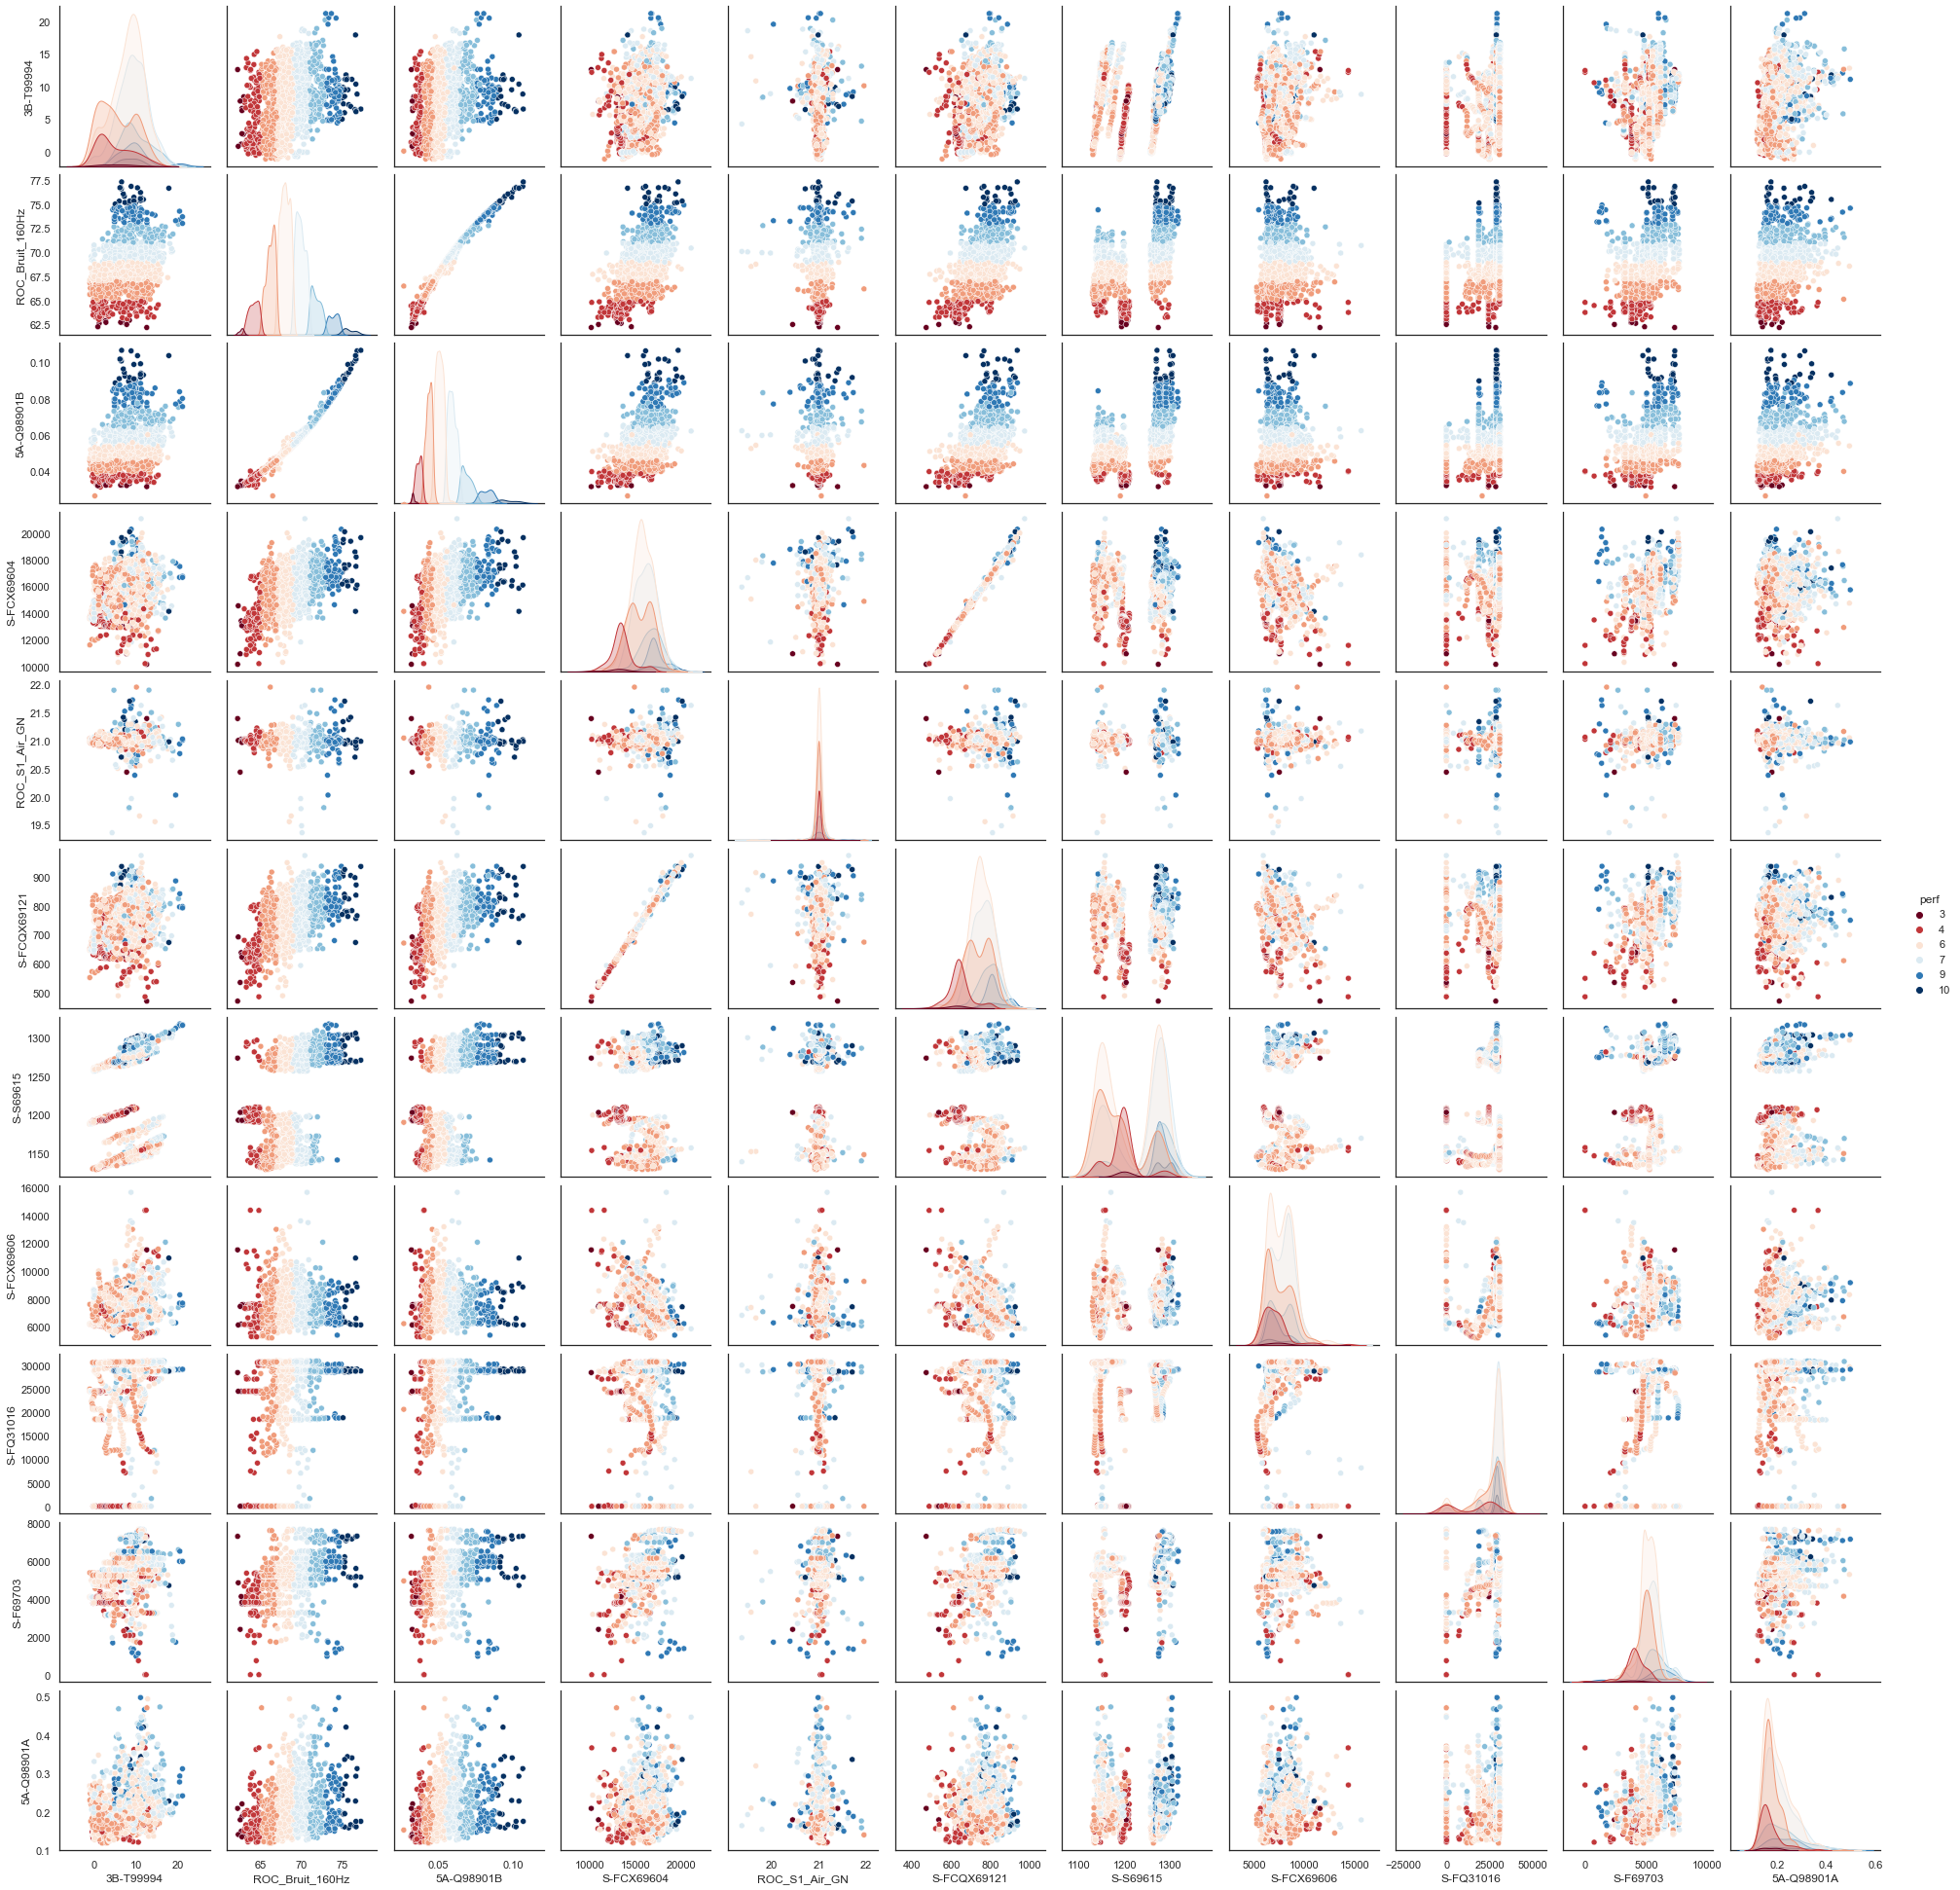

In [53]:
# sns.set_theme(style="ticks")
sns.set_theme(style='white',palette='Blues')
sns.color_palette("tab10")
sns.pairplot(data=result, hue='perf',palette='RdBu') 